# Bike Sharing Data Exploration

This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

## Wrangling

In [37]:
# import neccessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import os 

%matplotlib inline
# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [38]:
# change the current working directory to the notebooks's directory 
os.chdir(os.path.dirname(os.path.realpath('__file__')))
# load the dataset
bikeshare = pd.read_csv("201902-fordgobike-tripdata.csv")

In [39]:
# display overview of the data
print(bikeshare.info())
bikeshare.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [40]:
def get_distance(long1, lat1, long2, lat2):
    """ returns the distance between two
    locations given the lat and long of them

    Args:
        long1 (float): first location longitude
        lat1 (float): first location latitude
        long2 (float): second location longitude
        lat2 (float): second location latitude

    Returns:
        d (float): the distance between the two locations in KM
    """
    radius = 6371 # the raduis of the earth
    dlat = np.radians(np.abs(lat1-lat2))
    dlong = np.radians(np.abs(long1-long2))
    a = np.sin(dlat / 2) ** 2 + np.cos(np.radians(lat1)) * np.cos(np.radians(lat2)) * np.sin(dlong / 2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    d = radius * c
    return d
    

In [41]:
# generate the distance variable 
bikeshare['distance'] = get_distance(bikeshare.start_station_longitude,
                                     bikeshare.start_station_latitude,
                                     bikeshare.end_station_longitude,
                                     bikeshare.end_station_latitude) * 1e3
bikeshare.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,distance
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,544.708503
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,1742.999137
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,2704.545131
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,260.738544
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,2409.301416


In [42]:
bikeshare['age'] = 2019 - bikeshare.member_birth_year

In [43]:
# convert start and end time to be in datetime format
# and convert ids to str
bikeshare = bikeshare.astype({'start_time': np.Datetime64,
                              'end_time': np.Datetime64,
                              'start_station_id': str,
                              'end_station_id': str})

for col in ['start_station_id', 'end_station_id']:
    bikeshare[col] = bikeshare[col].apply(lambda x: x.split('.')[0])

In [44]:
bikeshare['weekday'] = bikeshare.start_time.dt.day_name()

<AxesSubplot:>

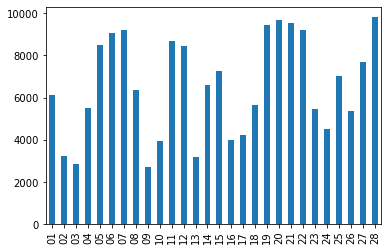

In [45]:
bikeshare.start_time.dt.strftime('%d').value_counts().sort_index().plot(kind='bar')

In [46]:
bikeshare.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,bike_id,member_birth_year,distance,age
count,183412.000000,183412.000000,183412.000000,183412.000000,183412.000000,183412.000000,175147.000000,183412.000000,175147.000000
mean,726.078435,37.771223,-122.352664,37.771427,-122.352250,4472.906375,1984.806437,1690.659008,34.193563
std,1794.389780,0.099581,0.117097,0.099490,0.116673,1664.383394,10.116689,1097.588997,10.116689
min,61.000000,37.317298,-122.453704,37.317298,-122.453704,11.000000,1878.000000,0.000000,18.000000
25%,325.000000,37.770083,-122.412408,37.770407,-122.411726,3777.000000,1980.000000,910.955336,27.000000
50%,514.000000,37.780760,-122.398285,37.781010,-122.398279,4958.000000,1987.000000,1430.737708,32.000000
75%,796.000000,37.797280,-122.286533,37.797320,-122.288045,5502.000000,1992.000000,2225.686841,39.000000
max,85444.000000,37.880222,-121.874119,37.880222,-121.874119,6645.000000,2001.000000,69469.240682,141.000000


In [47]:
bikeshare.query('age > 100')

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,distance,age,weekday
1285,148,2019-02-28 19:29:17.627,2019-02-28 19:31:45.967,158,Shattuck Ave at Telegraph Ave,37.833279,-122.263490,173,Shattuck Ave at 55th St,37.840364,-122.264488,5391,Subscriber,1900.0,Male,Yes,792.753345,119.0,Thursday
10827,1315,2019-02-27 19:21:34.436,2019-02-27 19:43:30.008,343,Bryant St at 2nd St,37.783172,-122.393572,375,Grove St at Masonic Ave,37.774836,-122.446546,6249,Subscriber,1900.0,Male,No,4747.020363,119.0,Wednesday
16087,1131,2019-02-27 08:37:36.864,2019-02-27 08:56:28.022,375,Grove St at Masonic Ave,37.774836,-122.446546,36,Folsom St at 3rd St,37.783830,-122.398870,4968,Subscriber,1900.0,Male,No,4307.705235,119.0,Wednesday
19375,641,2019-02-26 17:03:19.855,2019-02-26 17:14:01.619,9,Broadway at Battery St,37.798572,-122.400869,30,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,6164,Customer,1900.0,Male,No,2492.246512,119.0,Tuesday
21424,1424,2019-02-26 08:58:02.904,2019-02-26 09:21:47.749,375,Grove St at Masonic Ave,37.774836,-122.446546,343,Bryant St at 2nd St,37.783172,-122.393572,5344,Subscriber,1900.0,Male,No,4747.020363,119.0,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171996,1368,2019-02-03 17:33:54.607,2019-02-03 17:56:42.949,37,2nd St at Folsom St,37.785000,-122.395936,375,Grove St at Masonic Ave,37.774836,-122.446546,4988,Subscriber,1900.0,Male,No,4589.195613,119.0,Sunday
173711,993,2019-02-03 09:45:30.464,2019-02-03 10:02:04.169,375,Grove St at Masonic Ave,37.774836,-122.446546,36,Folsom St at 3rd St,37.783830,-122.398870,5445,Subscriber,1900.0,Male,No,4307.705235,119.0,Sunday
177708,1527,2019-02-01 19:09:28.387,2019-02-01 19:34:55.963,343,Bryant St at 2nd St,37.783172,-122.393572,375,Grove St at Masonic Ave,37.774836,-122.446546,5286,Subscriber,1900.0,Male,No,4747.020363,119.0,Friday
177885,517,2019-02-01 18:38:40.471,2019-02-01 18:47:18.392,25,Howard St at 2nd St,37.787522,-122.397405,30,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,2175,Subscriber,1902.0,Female,No,1228.913272,117.0,Friday


### The structure of the dataset

There are 183,412 rides in the dataset with 16 features ('duration_sec', 'start_time', 'end_time', 'start_station_id','start_station_name', 'start_station_latitude', 'start_station_longitude', 'end_station_id', 'end_station_name', 'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type', 'member_birth_year', 'member_gender' and 'bike_share_for_all_trip').<br>


### The main feature of interest

I'm most interested in figuring out what features are best for predicting the number and the duration of the rides in the dataset.

### Features that will help support the investigation into the number and duration of the ride

I expect that the distance between the start and end station will highly affect the rides. I also think that the age and the starting hour might also have an effect I am going to explore also the effect of the gender and user type.

## Univariate Exploration

I'll start by looking at the distribution of the main variable of interest: duration_sec.

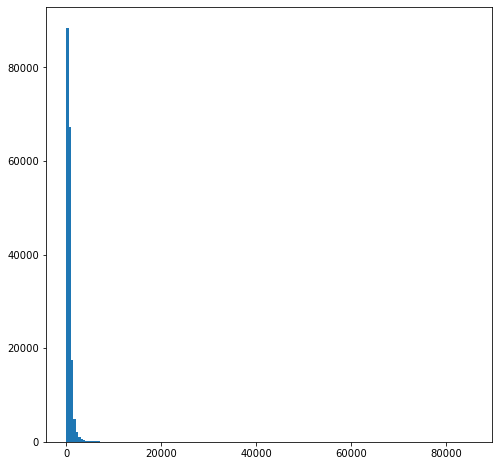

In [48]:
# start by exploring the distribution of the duration variable
binsize = 500 
binedges = np.arange(0, bikeshare.duration_sec.max()+binsize, binsize)
plt.figure(figsize=[8, 8])
plt.hist(data=bikeshare, x='duration_sec', bins=binedges);

nearly the whole data is set to the far left of the axes that means there is some strong outliers on the right. I will divide the dataset into two one with the major durations and other with the least occuring ones
 

In [49]:
major_bikeshare = bikeshare.query('duration_sec < 4000')

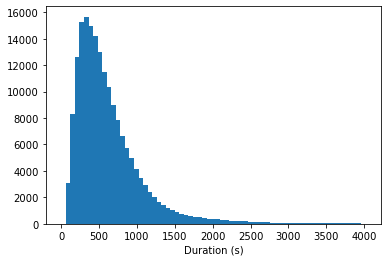

In [50]:
binsize = 60
binedges = np.arange(0, 4000+binsize, binsize)

plt.hist(data=major_bikeshare, x='duration_sec', bins=binedges)
plt.xlabel('Duration (s)');

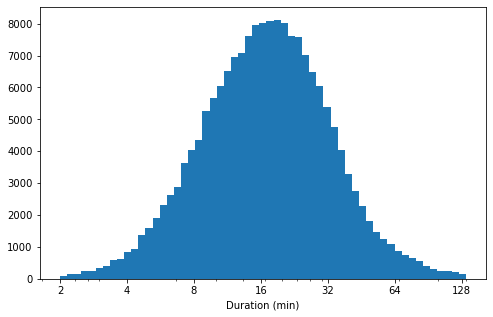

In [51]:
# there's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.032
binedges = 10 ** np.arange(np.log10(60), np.log10(major_bikeshare['duration_sec'].max())+log_binsize, log_binsize)
ticks = [60 * 2 ** i for i in range(7)]
labels = [f"{2 ** i}" for i in range(1, 8)]

plt.figure(figsize=[8, 5])
plt.hist(data = major_bikeshare, x='duration_sec', bins=binedges)
plt.xscale('log')
plt.xticks(ticks, labels)
plt.xlabel('Duration (min)');

duration has a long-tailed distribution, with lots of rides with short durations less than an hour and few with long durations greater than an hour, when ploted on a log-scale the duration distribution formed a normal distribution with most of the values around 10 to 32 mins.

Next: exploring the distance variable

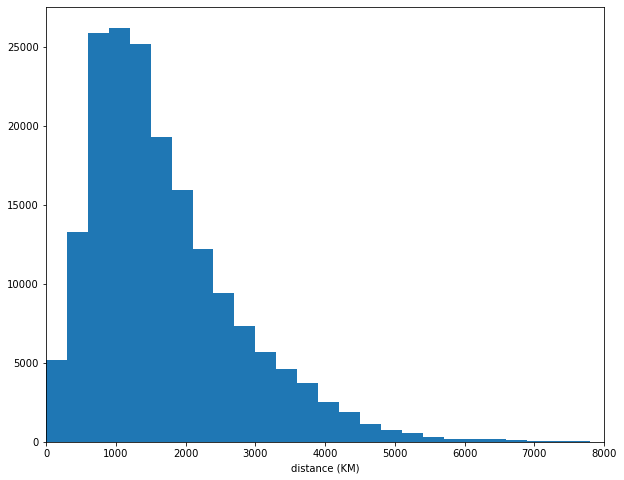

In [52]:
binsize = 300
binedges = np.arange(0, major_bikeshare.distance.max()+binsize, binsize)
plt.figure(figsize=[10, 8])
plt.hist(data=major_bikeshare, x='distance', bins=binedges)
plt.xlabel('distance (KM)')
plt.xlim([0, 8e3]);

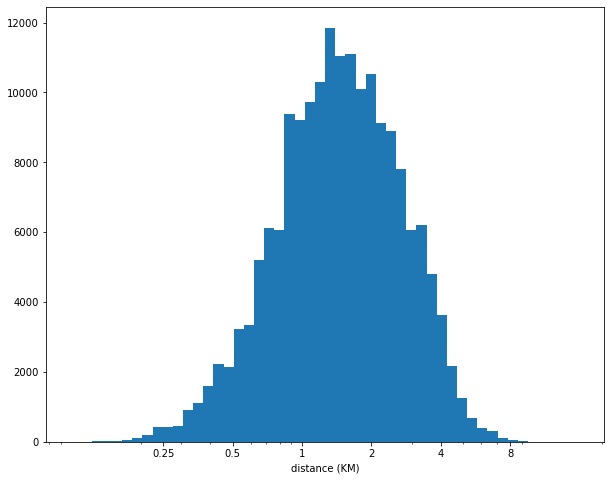

In [53]:

log_binsize = 0.044
binedges = 10 ** np.arange(2, np.log10(major_bikeshare.distance.max())+log_binsize, log_binsize)
ticks = [250 * 2 ** i for i in range(6)]
labels = [0.25, 0.5, 1, 2, 4, 8]
plt.figure(figsize=[10, 8])
plt.xscale('log')
plt.hist(data=major_bikeshare, x='distance', bins=binedges)
plt.xlabel('distance (KM)')
plt.xticks(ticks, labels);

like the duration distribution the distance distribution is long-tailed right skewed with most of the data in the short distance range less than 3 km, on the log-scale it transformed to a normal distribution and showed that most of the rides were between 1 and 3 kilometers.

Next: explore the age distribution

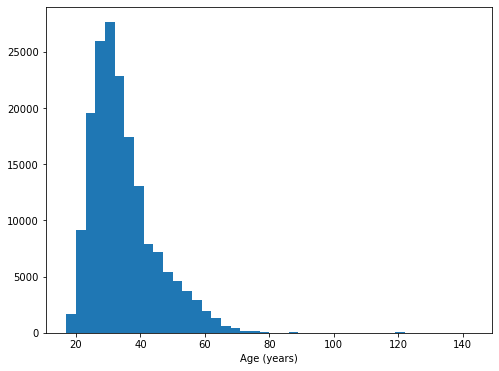

In [54]:
binsize = 3
binedges = np.arange(17, 141+binsize, binsize)

plt.figure(figsize=[8,6])
plt.hist(data=major_bikeshare, x='age', bins=binedges)
plt.xlabel('Age (years)');

the age distribution is right skewed and the most common ages are between 20 and 40 years old. there are a few outliers for ages greater than 80.

Next: plot the most common days of week

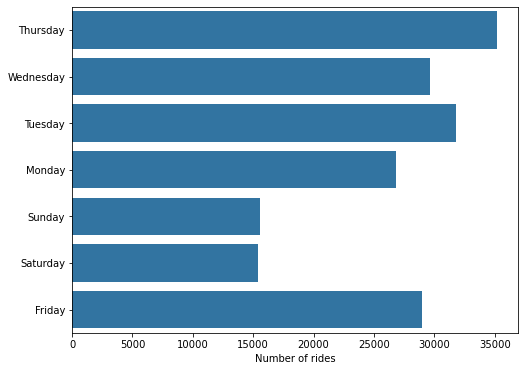

In [55]:
base_color = sns.color_palette()[0]

plt.figure(figsize=[8, 6])
sns.countplot(data=bikeshare, y='weekday', color=base_color)
plt.xlabel('Number of rides')
plt.ylabel('');

from the chart it's obvious that work days have higher number of rides.

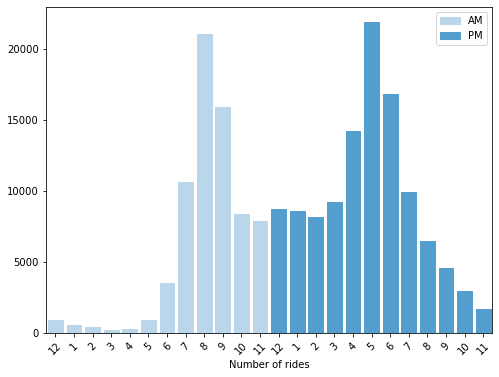

In [56]:
def plt_day_dist(x, **kwargs):
    base_colors = sns.color_palette('Blues')
    ticks = np.arange(0, 24)
    color = 12 * [base_colors[1]] + 12 * [base_colors[3]]
    labels = ['12'] + [f"{i}" for i in range(1, 12)]
    labels = labels * 2
    ax = sns.countplot(x=x.dt.hour)
    ax.set_xlabel('Number of rides')
    ax.set_xticks(ticks=ticks, labels=labels, rotation=45)
    ax.set_ylabel('')
    for p,c in zip(ax.patches, color):
        p.set_color(c)
    am = mpatches.Patch(color=base_colors[1], label='AM')
    pm = mpatches.Patch(color=base_colors[3], label='PM')
    ax.legend(handles=[am, pm])
    
        
plt.figure(figsize=[8, 6])
plt_day_dist(bikeshare.start_time)

we notice that the distribution along the day hours is biomodal with one peak between 7 and 9 AM and another peak between 4 and 6 PM

The previous two charts indicates that the most frequant rides are on working days, the most frequent hours are when workers go and come back from their work. 

Next: explore the gender variable

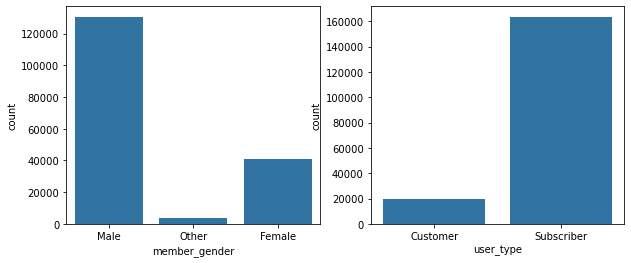

In [57]:
base_color = sns.color_palette()[0]

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=[10, 4])
sns.countplot(data=bikeshare, x='member_gender', color=base_color, ax=axs[0])
sns.countplot(data=bikeshare, x='user_type', color=base_color, ax=axs[1]);

the vast majority of users are males and subscribers

## Bivariate Exploration

I will explore in this part if there is a correlation between any of the numerical variables 

In [58]:
numeric_vars = ['duration_sec', 'age', 'distance']
categoric_vars = ['member_gender', 'user_type', 'weekday']

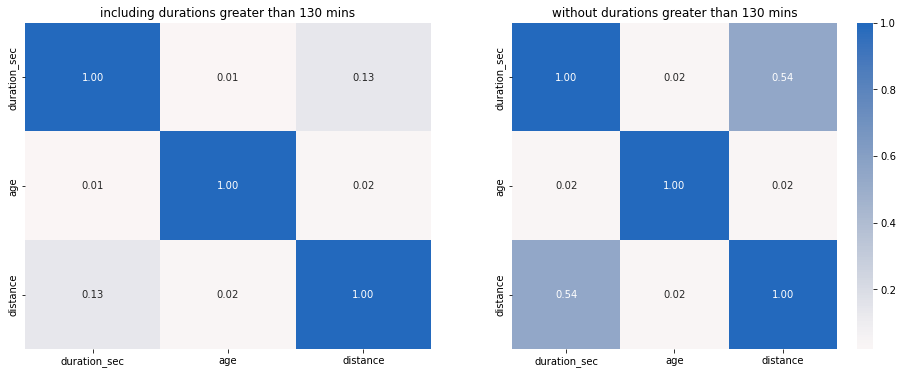

In [59]:
# correlation plot including outliers
fig, axs = plt.subplots(ncols=2, figsize=[16, 6])
sns.heatmap(bikeshare[numeric_vars].corr(), annot = True, fmt = '.2f',
           cmap = 'vlag_r', center = 0, ax=axs[0], cbar=False)
axs[0].set_title("including durations greater than 130 mins")

sns.heatmap(major_bikeshare[numeric_vars].corr(), annot = True, fmt = '.2f',
           cmap = 'vlag_r', center = 0, ax=axs[1])
axs[1].set_title("without durations greater than 130 mins");


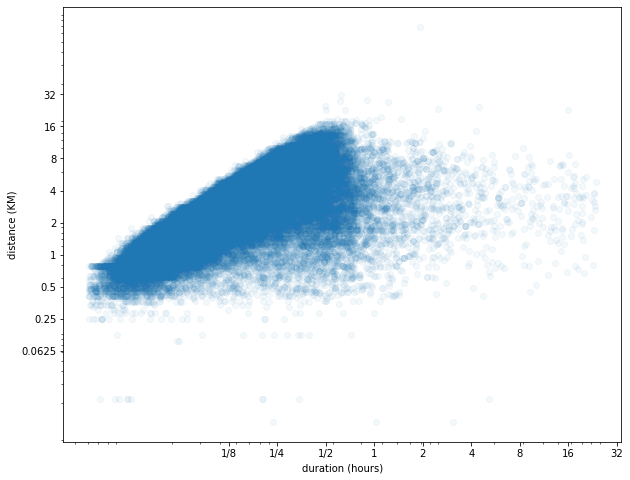

In [60]:
log_binsize = 0.044
binedges = 10 ** np.arange(2, np.log10(major_bikeshare.distance.max())+log_binsize, log_binsize)

yticks = [62.5 * 2 ** i for i in range(9)]
ylabels = [0.0625, 0.25, 0.5, 1, 2, 4, 8, 16, 32]
xticks = [7.5 * 60, 15 * 60, 30 * 60] + [60 * 60 * 2 ** i for i in range(6)]
xlabels = ['1/8', '1/4', '1/2'] + [f"{2 ** i}" for i in range(6)]
plt.figure(figsize=[10, 8])
plt.yscale('log')
plt.xscale('log')
plt.scatter(data=bikeshare, x = 'duration_sec', y = 'distance', alpha = 1/20)
plt.ylabel('distance (KM)')
plt.yticks(yticks, ylabels)
plt.xticks(xticks, xlabels)
plt.xlabel('duration (hours)');

from the previous two charts we observe that there is a correlation between the distance and the duration of the ride when we exclude the durations greater than 130 mins, this correlation vanishes when we include them, probably rides that takes more than 130 mins have lots of stops and more time wasted not riding the bike, or maybe near their distnations there is no bike station so they come back to the nearest station, in general the reason the correlation vanishes because there is a limited number of stations.<br><br>
- we might say that rides that take less than 30 minutes are most commonly used as a transportation mostly to work.
- there is no correlation between age and duration

How are the numeric variables correlated to categoric variables?

<Figure size 720x432 with 0 Axes>

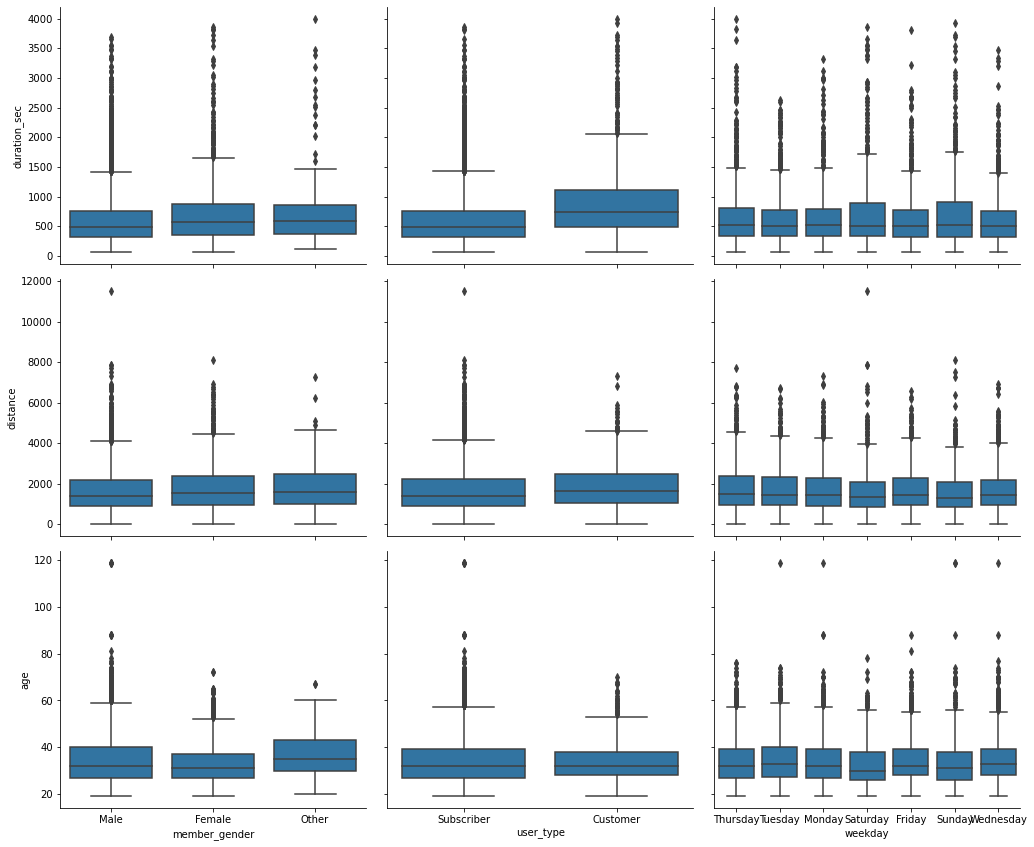

In [61]:
# plot matrix of numeric features against categorical features.
# can use a larger sample since there are fewer plots and they're simpler in nature.

samples = np.random.choice(major_bikeshare.shape[0], 9000, replace = False)
bikeshare_samp = major_bikeshare.iloc[samples,:]

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sns.color_palette()[0]
    sns.boxplot(x=x, y=y, color = default_color)

plt.figure(figsize = [10, 6])
g = sns.PairGrid(data=bikeshare_samp, y_vars = ['duration_sec', 'distance', 'age'], x_vars = categoric_vars,
                height = 4, aspect = 1.2)
g.map(boxgrid);

it appears to be customer's rides in general are associeted with long duration and long distance than subscriber's, the same goes for females over males and other genders.<br><br>
the weekday seems to have no effect on the duration neither the distance distributions.

Is the type of user or gender correlated to the number of rides for each weekday?

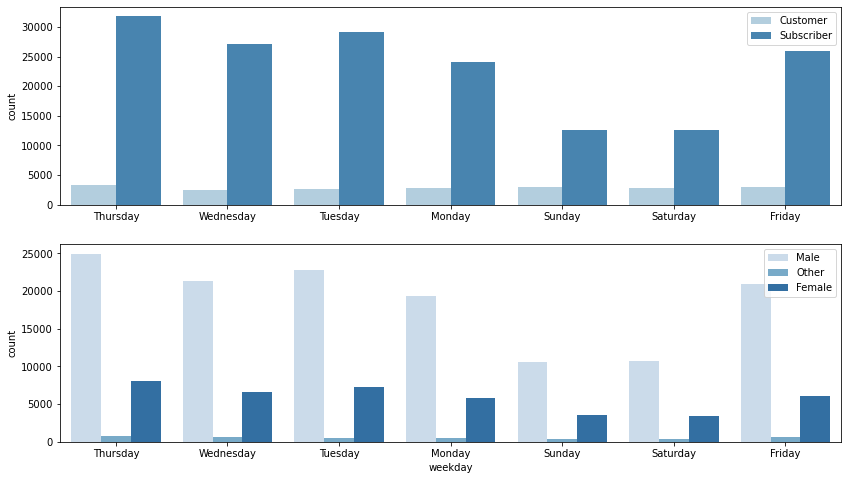

In [62]:
fig, axs = plt.subplots(nrows=2, figsize=[14, 8])

sns.countplot(data=bikeshare, hue='user_type', x='weekday', palette='Blues', ax=axs[0])
axs[0].set_xlabel('')
axs[0].legend(loc='upper right')
sns.countplot(data=bikeshare, hue='member_gender', x='weekday', palette='Blues', ax=axs[1])
axs[1].legend(loc='upper right', title='');

- it appers that the number of customers isn't affected by the day, in contrast subscribers are more common to ride in working days.

Is the distribution of rides over day hours affected by each weekday?

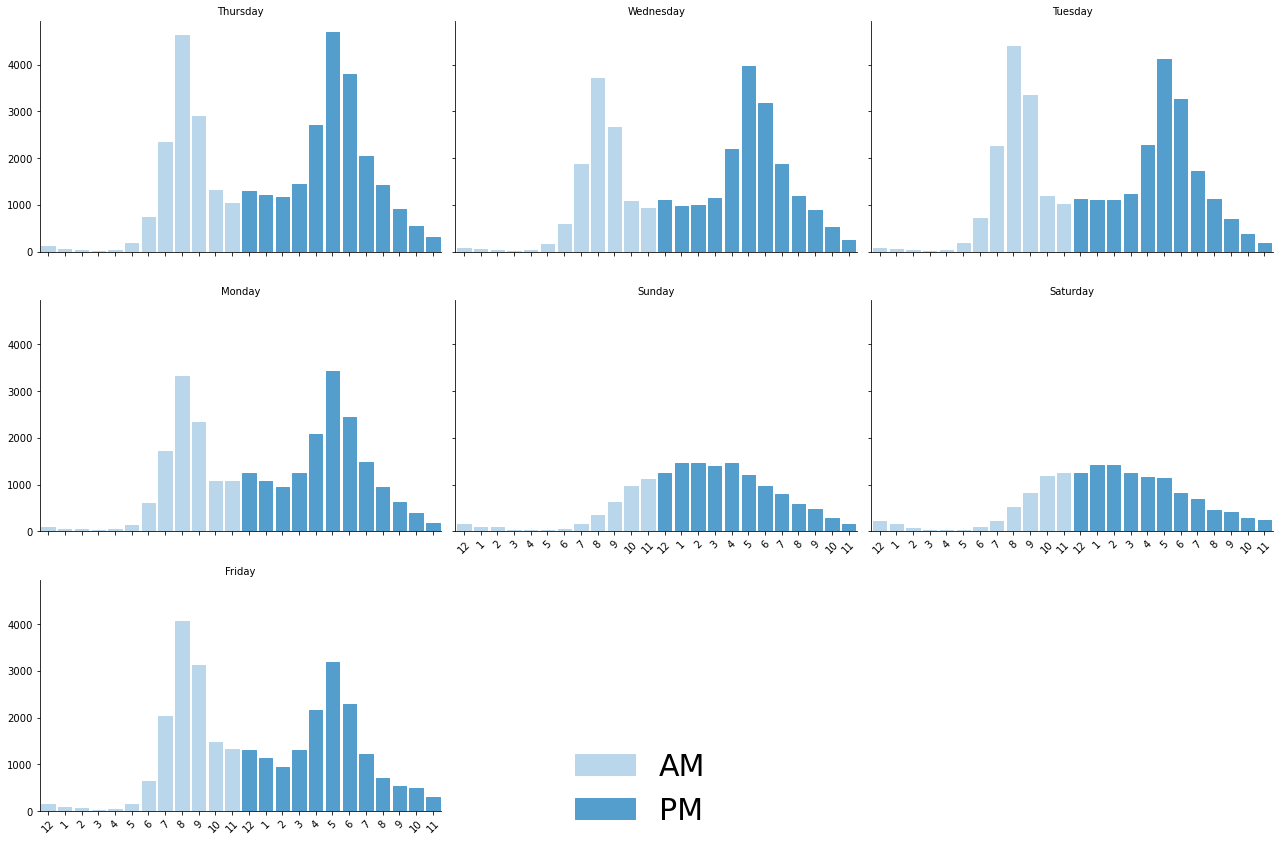

In [63]:

base_colors = sns.color_palette('Blues')
am = mpatches.Patch(color=base_colors[1], label='AM')
pm = mpatches.Patch(color=base_colors[3], label='PM')
g = sns.FacetGrid(data = major_bikeshare, col = 'weekday', col_wrap = 3, height = 4, aspect=1.5)
g.map(plt_day_dist, 'start_time')
g.set_xlabels('')
g.set_ylabels('')
g.set_titles(col_template="{col_name}")
g.add_legend(legend_data={'AM': am, 'PM': pm}, loc='lower center', fontsize=30);

the distribution of rides over the hours of day is bimodal for all working days and it transforms to unimodal for weekends with one spike between 12 and 5 pm.

## Multivariate Exploration

In [64]:
def hist2dgrid(x, y, **kwargs):
    """ Quick hack for creating heat maps with seaborn's PairGrid. """
    palette = kwargs.pop('color')
    
    x_log_binsize = 0.040
    y_log_binsize = 0.044
    bins_x = 10 ** np.arange(np.log10(60), np.log10(major_bikeshare.duration_sec.max())+x_log_binsize, x_log_binsize)
    bins_y = 10 ** np.arange(2, np.log10(major_bikeshare.distance.max())+y_log_binsize, y_log_binsize)
    xticks = [60 * 2 ** i for i in range(7)]
    xlabels = [f"{2 ** i}" for i in range(1, 8)]
    yticks = [250 * 2 ** i for i in range(6)]
    ylabels = [0.25, 0.5, 1, 2, 4, 8]
    
    plt.hist2d(x, y, bins=[bins_x, bins_y], cmap = palette, cmin = 0.5)
    plt.xscale('log')
    plt.yscale('log')
    plt.xticks(xticks, xlabels)
    plt.yticks(yticks, ylabels)
    

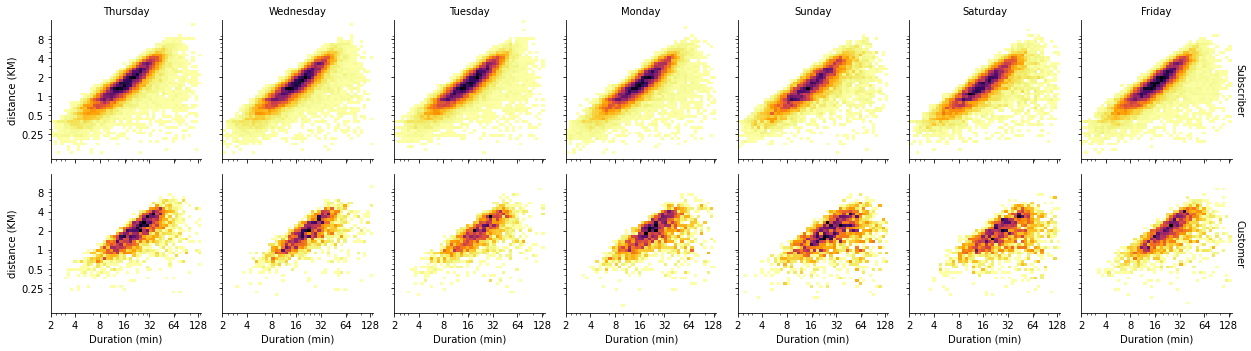

In [65]:

x_log_binsize = 0.040
y_log_binsize = 0.044
bins_x = 10 ** np.arange(np.log10(60), np.log10(major_bikeshare.duration_sec.max())+x_log_binsize, x_log_binsize)
bins_y = 10 ** np.arange(2, np.log10(major_bikeshare.distance.max())+y_log_binsize, y_log_binsize)

g = sns.FacetGrid(data = major_bikeshare, col = 'weekday', row = 'user_type', height = 2.5, margin_titles = True)
g.map(hist2dgrid, 'duration_sec', 'distance', bins=[bins_x, bins_y], color = 'inferno_r')
g.set_xlabels('Duration (min)')
g.set_ylabels('distance (KM)')
g.set_titles(col_template="{col_name}", row_template="{row_name}");

the relationship between distance and duration seem to be linearly correlated for both customers and subscribers, but this relationship becomes weak for custumors and the points becomes more spread.

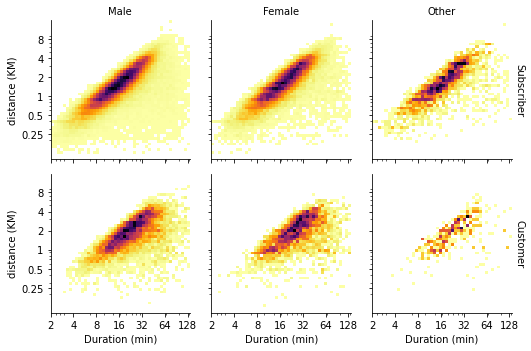

In [66]:

g = sns.FacetGrid(data = major_bikeshare, col = 'member_gender', row = 'user_type', height = 2.5, margin_titles = True)
g.map(hist2dgrid, 'duration_sec', 'distance', color = 'inferno_r')
g.set_xlabels('Duration (min)')
g.set_ylabels('distance (KM)')
g.set_titles(col_template="{col_name}", row_template="{row_name}");

the correlation between duration and distance is not affected by user type nor gender.

What the effect of weekdays and usertype over the duration?

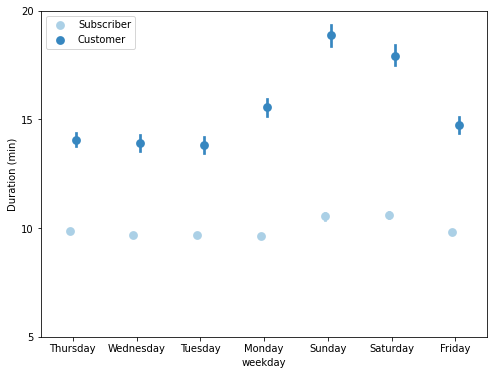

In [67]:
ticks = [i * 60 for i in range(5, 25 , 5)]
labels = [f"{i // 60}" for i in ticks]

fig = plt.figure(figsize = [8,6])
ax = sns.pointplot(data = major_bikeshare, x = 'weekday', y = 'duration_sec', hue = 'user_type',
           palette = 'Blues', linestyles = '', dodge = 0.1)

ax.set_yticks(ticks, labels)
ax.set_yticklabels([],minor = True)
ax.set_ylabel('Duration (min)')
ax.legend(title='');

the average duration is higher for customers than subscribers, it also has more variation. and the avg duration in general increases on weekends.

Explore gender and user type with the duration

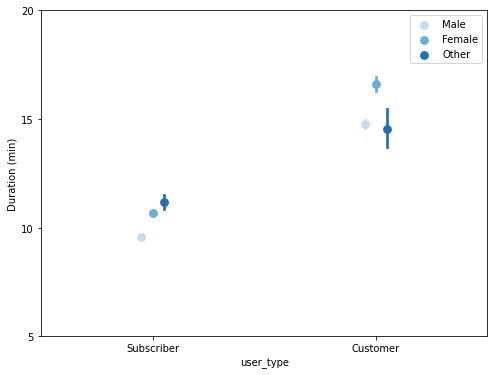

In [68]:
ticks = [i * 60 for i in range(5, 25 , 5)]
labels = [f"{i // 60}" for i in ticks]

fig = plt.figure(figsize = [8,6])
ax = sns.pointplot(data = major_bikeshare, x = 'user_type', y = 'duration_sec', hue = 'member_gender',
           palette = 'Blues', linestyles = '', dodge = 0.1)

ax.set_yticks(ticks, labels)
ax.set_yticklabels([],minor = True)
ax.set_ylabel('Duration (min)')
ax.legend(title='');

male customers ride bikes for more time than other genders, and male subscribers ride for less time than others.

## Conclusions
since there was a lot of outliers on the duration distribution I choosed to get rid of them and build the major data frame to get better results and I created the distance, age and weekday columns to help me get insights about the dataset the most important discovery I think from the analysis I think is how the number of rides is correlated with the weekday and the hour.

<br>

In conclusion we notice that probably most of the clients of the bike-sharing busnisses use the bikes as a transportation to go to thier work or school and most of them are regular subscribers.
as we found some insights that support this conclusion: 
- work days have higher number of rides.
- The distribution of rides over the hours of day is bimodal for all working days with one peak between 7 and 9 AM and another peak between 4 and 6 PM
- It transforms to unimodal for weekends with one spike between 12 and 5 pm.
- the most frequant rides are on working days, the most frequent hours are when workers go and come back from their work.
- The average duration is higher for customers than subscribers, it also has more variation. and the avg duration in general increases on weekends.
- the most common ages are between 20 and 40 years old. there are a few outliers for ages greater than 80, which's the age most of the employees are.

